### Installing deep-translator and openpyxl

In [ ]:
pip install deep-translator

In [ ]:
pip install openpyxl

### Imports and opening the Mendley and Kaggle datasets

In [52]:
import pandas as pd
import numpy as np
import openpyxl
from deep_translator import GoogleTranslator

xls = pd.ExcelFile('mendley_data.xlsx', engine='openpyxl')
print(xls.sheet_names)

d1 = pd.read_excel(xls, sheet_name='Data')
d2 = pd.read_csv('kaggle_data.csv')

d2.rename(columns={'name': 'Breed'}, inplace=True)
d2.to_csv('kaggle_data.csv', index=False)

['Data', 'Code']


### Mendley dataset column translation

In [53]:
translator = GoogleTranslator(source='fr', target='en')
d1.columns = [translator.translate(col) for col in d1.columns]
print("Column names translated:", d1.columns)
print("Translation complete for all columns!")

Column names translated: Index(['Row.names', 'Time stamp', 'Sex', 'Age', 'Breed', 'Number',
       'Accommodation', 'Area', 'Ext', 'Obs', 'Shy', 'Calm', 'Afraid',
       'Clever', 'Vigilant', 'Persevering', 'Affectionate', 'Friendly',
       'Lonely', 'Brutal', 'Dominant', 'Aggressive', 'Impulsive',
       'Predictable', 'Distracted', 'Abundance', 'PredBird', 'PredMamm',
       'More'],
      dtype='object')
Translation complete for all columns!


### Age and Breed mapping for error values verification (using the 'Code' sheet from the Mendley dataset)

In [54]:
# BEN/SBI/BRI/CHA/EUR/MCO/PER/RAG/SPH/ORI/TUV/ Autre/NSP
#Bengal/ Birman/ British Shorthair/ Chartreux / European/ Maine coon / Persian/ Ragdoll/ Savannah / Sphynx/ Siamese/ Turkish angora / No breed / Other / Unknown

#BEN - bengal
#SBI - Birman
#BRI - British ShortHair
#CHA - Chartreux
#EUR - European
#MCO - Maine coon
#PER - Persian
#RAG - Ragdoll
#SPH - Savannah
#ORI - ? Sphynx
#TUV - Siamese
#Autre - Other
#NSP - Unknown

d1['Breed'] = d1['Breed'].astype(str)
d2['Breed'] = d2['Breed'].astype(str)

breed_mapping = {
    'BEN': 'Bengal',
    'SBI': 'Birman',
    'BRI': 'British Shorthair',
    'CHA': 'Chartreux',
    'EUR': 'European',
    'MCO': 'Maine coon',
    'PER': 'Persian',
    'RAG': 'Ragdoll',
    'SPH': 'Savannah',
    'ORI': 'Sphynx',
    'TUV': 'Siamese',
    'Autre': 'Other',
    'NSP': 'Unknown'
}

if 'Breed' in d1.columns:

    original_breeds = d1['Breed'].unique()
    
    d1['Breed'] = d1['Breed'].replace(breed_mapping)
    print("Breed column values updated:")

    invalid_breeds = [breed for breed in original_breeds if breed not in breed_mapping]
    if invalid_breeds:
        print("Error: The following breeds are not recognized in the breed_mapping dictionary:")
        print(invalid_breeds)
    else:
        print("All breeds were correctly mapped.")
else:
    print("No 'Breed' column found in the dataset.")

print("Breed mapping complete.")

# age mapping 


age_mapping = {
    'Moinsde1': 0.5, 
    '1a2': 1.5,     
    '2a10': 6,        
    'Plusde10': 11,  
    'NR': np.nan     
}

if 'Age' in d1.columns:
    original_ages = d1['Age'].unique()
    d1['Age'] = d1['Age'].replace(age_mapping)
    print("Age column values converted to numerical:")
    print(d1[['Age']].head())  

    invalid_ages = [age for age in original_ages if age not in age_mapping]
    
    if invalid_ages:
        print("Error: The following age values are not recognized in the age_mapping dictionary:")
        print(invalid_ages)
    else:
        print("All age values were correctly mapped.")
else:
    print("No 'Age' column found in the dataset.")


print("Age mapping complete.")


Breed column values updated:
Error: The following breeds are not recognized in the breed_mapping dictionary:
['NR', 'SAV']
Breed mapping complete.
Age column values converted to numerical:
   Age
0  0.5
1  0.5
2  6.0
3  0.5
4  1.5
All age values were correctly mapped.
Age mapping complete.


C:\Users\Alina\AppData\Local\Temp\ipykernel_41832\1133818104.py:68: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d1['Age'] = d1['Age'].replace(age_mapping)


### Counting and removing identic instances (duplicates) (by removing row number, more and timestamp columns)

In [55]:
filtered_columns = d1.drop(columns=["Row.names", "Time stamp", "More"])

duplicate_rows = filtered_columns.duplicated().sum()
print("Number of duplicate rows: ")
print(duplicate_rows)

missing_values = filtered_columns.isnull().sum()
print("Number of missing values: ")
print(missing_values)


filtered_columns_cleaned = filtered_columns.drop_duplicates()
d1_cleaned = filtered_columns_cleaned.join(d1[["Row.names", "Time stamp", "More"]])

duplicate_rows_after = filtered_columns_cleaned.duplicated().sum()
print("Number of duplicate rows after dropping duplicates: ")
print(duplicate_rows_after)

d1 = d1_cleaned

Number of duplicate rows: 
4
Number of missing values: 
Sex              0
Age              0
Breed            0
Number           0
Accommodation    0
Area             0
Ext              0
Obs              0
Shy              0
Calm             0
Afraid           0
Clever           0
Vigilant         0
Persevering      0
Affectionate     0
Friendly         0
Lonely           0
Brutal           0
Dominant         0
Aggressive       0
Impulsive        0
Predictable      0
Distracted       0
Abundance        0
PredBird         0
PredMamm         0
dtype: int64
Number of duplicate rows after dropping duplicates: 
0


### Printing statistics

In [ ]:
breed_number = d1['Breed'].value_counts()
print("Number of instances per class (Breed):")
print(breed_number)


exclude_columns = ["Row.names", "More", "Time stamp"]

print("\nDistinct values and frequencies for each attribute (entire dataset):\n")
for column in d1.columns:
    if column not in exclude_columns:
        unique_values = d1[column].value_counts()
        most_frequent_value = unique_values.idxmax()
        most_frequent_count = unique_values.max()
        
        print(f"Column: {column}")
        print(unique_values)
        print(f"Total distinct values in {column}: {len(unique_values)}\n")
        print(f"Most frequent value in {column}: {most_frequent_value} (Frequency: {most_frequent_count})\n")


print("\nDistinct values and frequencies for each attribute within each breed:\n")
if 'Breed' in d1.columns:
    for breed_value, group in d1.groupby('Breed'):
        print(f"\nFor Breed: {breed_value}")
        for column in d1.columns:
            if column not in exclude_columns and column != 'Breed':
                unique_values_per_class = group[column].value_counts()
                most_frequent_value = unique_values_per_class.idxmax() if not unique_values_per_class.empty else None
                most_frequent_count = unique_values_per_class.max() if not unique_values_per_class.empty else None
                
                print(f"Column: {column}")
                print(unique_values_per_class)
                print(f"Total distinct values in {column} for Breed {breed_value}: {len(unique_values_per_class)}")
                if most_frequent_value is not None:
                    print(f"Most frequent value in {column} for Breed {breed_value}: {most_frequent_value} (Frequency: {most_frequent_count})\n")
else:
    print("The 'Breed' column is not present in the dataset.")


### Augumenting the Mendley dataset with the Kaggle dataset

In [57]:
merged_df = pd.merge(d1, d2, on='Breed', how='outer') 

merged_df.to_csv('merged_dataset.csv', index=False)

print("Merged DataFrame head:")
print(merged_df.head())

Merged DataFrame head:
   Sex  Age               Breed Number Accommodation Area  Ext  Obs  Shy  \
0  NaN  NaN          Abyssinian    NaN           NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN              Aegean    NaN           NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN    American Bobtail    NaN           NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  American Shorthair    NaN           NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN  American Shorthair    NaN           NaN  NaN  NaN  NaN  NaN   

   Calm  ...  min_weight  max_weight  family_friendly  shedding  \
0   NaN  ...         6.0        10.0              3.0       3.0   
1   NaN  ...         7.0        10.0              5.0       3.0   
2   NaN  ...         8.0        13.0              4.0       4.0   
3   NaN  ...         7.0        12.0              3.0       3.0   
4   NaN  ...         7.0        12.0              3.0       3.0   

   general_health  playfulness  children_friendly  grooming  intelligence  \
0             2.0          5.0          

### Transforming non-numeric atributtes to numeric

In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = merged_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Encoding column: {col}")
    merged_df[col] = label_encoder.fit_transform(merged_df[col].astype(str)) 


print(merged_df.head(5))


merged_df.to_csv('encoded_data.csv', index=False)
print("Non-numeric attributes transformed to numeric and file saved.")


Encoding column: Sex
Encoding column: Breed
Encoding column: Number
Encoding column: Accommodation
Encoding column: Area
Encoding column: Abundance
Encoding column: More
Encoding column: length
Encoding column: origin
   Sex  Age  Breed  Number  Accommodation  Area  Ext  Obs  Shy  Calm  ...  \
0    3  NaN      0       6              4     3  NaN  NaN  NaN   NaN  ...   
1    3  NaN      1       6              4     3  NaN  NaN  NaN   NaN  ...   
2    3  NaN      2       6              4     3  NaN  NaN  NaN   NaN  ...   
3    3  NaN      3       6              4     3  NaN  NaN  NaN   NaN  ...   
4    3  NaN      3       6              4     3  NaN  NaN  NaN   NaN  ...   

   min_weight  max_weight  family_friendly  shedding  general_health  \
0         6.0        10.0              3.0       3.0             2.0   
1         7.0        10.0              5.0       3.0             4.0   
2         8.0        13.0              4.0       4.0             4.0   
3         7.0        12.0      

### Identifying columns with missing values due to the previous merge

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

merged_df = pd.read_csv('encoded_data.csv')

merged_df.drop(columns="Time stamp", inplace=True)

missing_cols = merged_df.columns[merged_df.isna().any()].tolist()

print("Columns with missing values:")
print(missing_cols)

complete_cols = [col for col in merged_df.columns if col not in missing_cols]
print("Columns without missing values:")
print(complete_cols)

Columns with missing values:
['Age', 'Ext', 'Obs', 'Shy', 'Calm', 'Afraid', 'Clever', 'Vigilant', 'Persevering', 'Affectionate', 'Friendly', 'Lonely', 'Brutal', 'Dominant', 'Aggressive', 'Impulsive', 'Predictable', 'Distracted', 'PredBird', 'PredMamm', 'Row.names', 'min_life_expectancy', 'max_life_expectancy', 'min_weight', 'max_weight', 'family_friendly', 'shedding', 'general_health', 'playfulness', 'children_friendly', 'grooming', 'intelligence', 'other_pets_friendly']
Columns without missing values:
['Sex', 'Breed', 'Number', 'Accommodation', 'Area', 'Abundance', 'More', 'length', 'origin']


### Training a Random Forest model to complete the missing values

In [60]:
features = merged_df.drop(columns=missing_cols) # vrem ca target sa avem missing cols, deci antrenam pe celelalte coloane
features = features.dropna()
# acum avem features care nu are randuri cu valori NaN si nici nu are coloanele din missing

def train_model_for_missing_value(column_name):
    
    train_df = merged_df[merged_df[column_name].notnull()] #selectam randurile care nu au coloana column_name NaN(e pt training)
    
    X = features.loc[train_df.index] #selectam randurile pentru antrenare
    
    # Target-ul este coloana pe care vrem să o prezicem (column_name)
    y = train_df[column_name]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
    
    model = RandomForestRegressor(n_estimators=100, random_state=50)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {column_name}: {mse}")
    
    return model

# Antrenam modelele pt fiecare coloana
models = {}
for col in missing_cols:
    print(f"Training model to predict missing values for {col}")
    models[col] = train_model_for_missing_value(col)
    
print("Training done!")

Training model to predict missing values for Age
Mean Squared Error for Age: 12.354892879238585
Training model to predict missing values for Ext
Mean Squared Error for Ext: 0.9783567677675209
Training model to predict missing values for Obs
Mean Squared Error for Obs: 0.41091139728042647
Training model to predict missing values for Shy
Mean Squared Error for Shy: 2.1671907367136067
Training model to predict missing values for Calm
Mean Squared Error for Calm: 1.5366504135229633
Training model to predict missing values for Afraid
Mean Squared Error for Afraid: 1.5821577107996792
Training model to predict missing values for Clever
Mean Squared Error for Clever: 0.9724515880359492
Training model to predict missing values for Vigilant
Mean Squared Error for Vigilant: 1.4234140915197082
Training model to predict missing values for Persevering
Mean Squared Error for Persevering: 1.4055201230532346
Training model to predict missing values for Affectionate
Mean Squared Error for Affectionate: 

### Using the model to augument the dataset

In [61]:
def augument_dataset(df, column_name, model):

    nan_rows = df[df[column_name].isna()]
    
    X_nan = nan_rows.drop(columns=missing_cols).dropna()
    if X_nan.empty:
        print(f"No valid rows left to predict {column_name}.")
        return
         
    predicted_values = model.predict(X_nan)

    df.loc[df[column_name].isna(), column_name] = predicted_values
    print(f"Added missing values for {column_name}")


augmented_df = merged_df.copy()

for col in missing_cols:
    augument_dataset(augmented_df, col, models[col])

augmented_df.to_csv('augumented_dataset.csv', index=False)
print("Imputed missing values and saved the dataset.")

print(augmented_df.head(15))

Added missing values for Age
Added missing values for Ext
Added missing values for Obs
Added missing values for Shy
Added missing values for Calm
Added missing values for Afraid
Added missing values for Clever
Added missing values for Vigilant
Added missing values for Persevering
Added missing values for Affectionate
Added missing values for Friendly
Added missing values for Lonely
Added missing values for Brutal
Added missing values for Dominant
Added missing values for Aggressive
Added missing values for Impulsive
Added missing values for Predictable
Added missing values for Distracted
Added missing values for PredBird
Added missing values for PredMamm
Added missing values for Row.names
Added missing values for min_life_expectancy
Added missing values for max_life_expectancy
Added missing values for min_weight
Added missing values for max_weight
Added missing values for family_friendly
Added missing values for shedding
Added missing values for general_health
Added missing values for 

### Plots

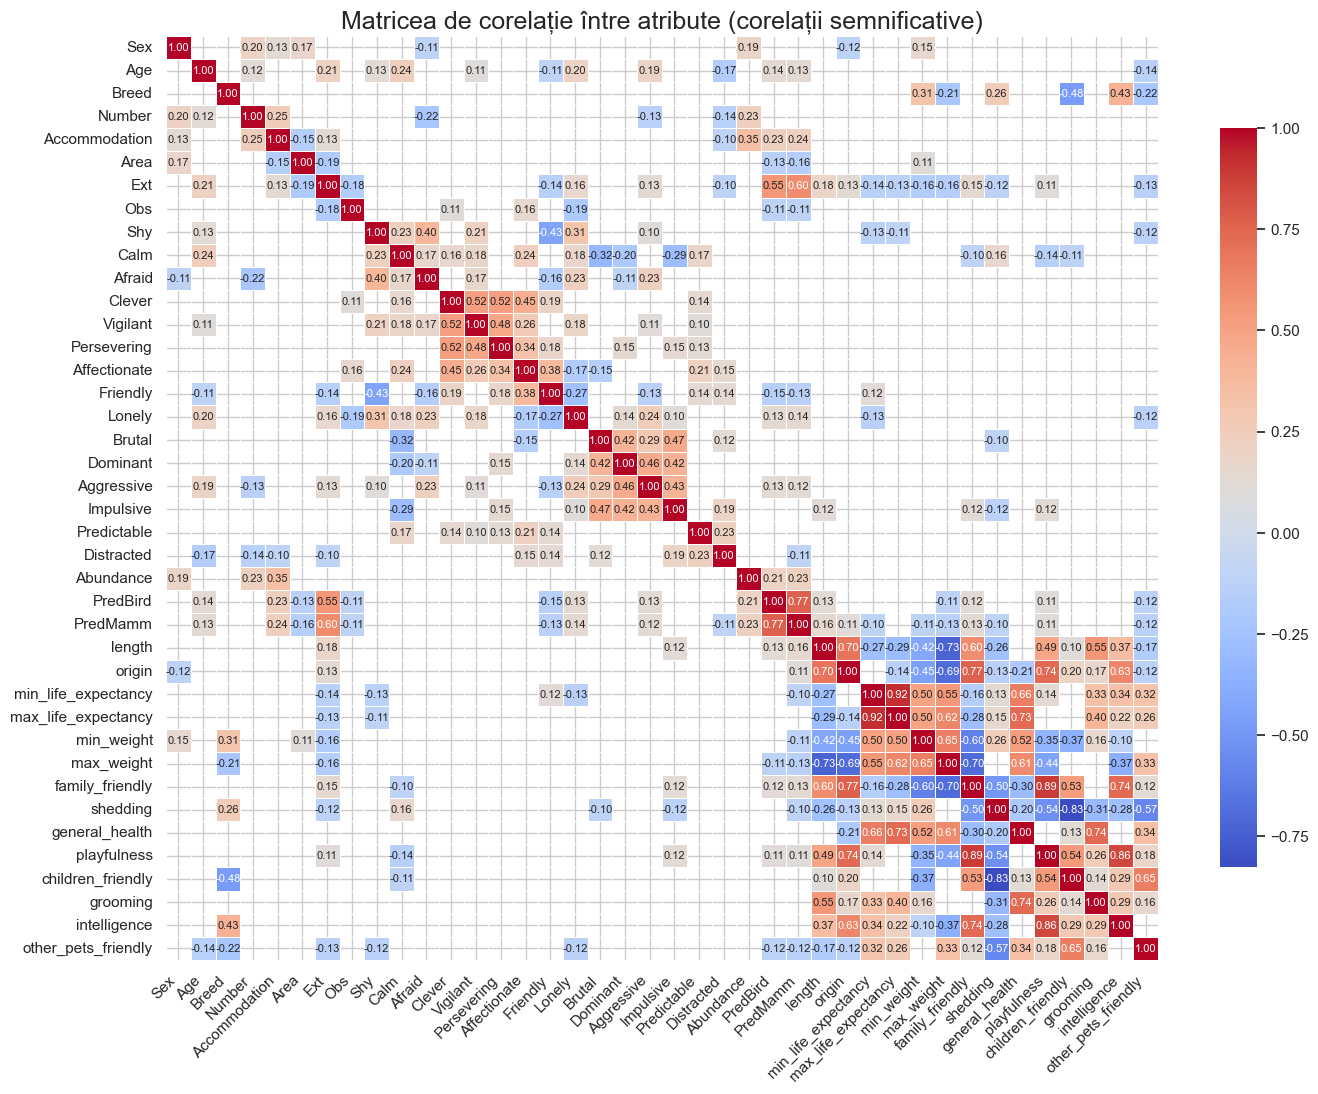

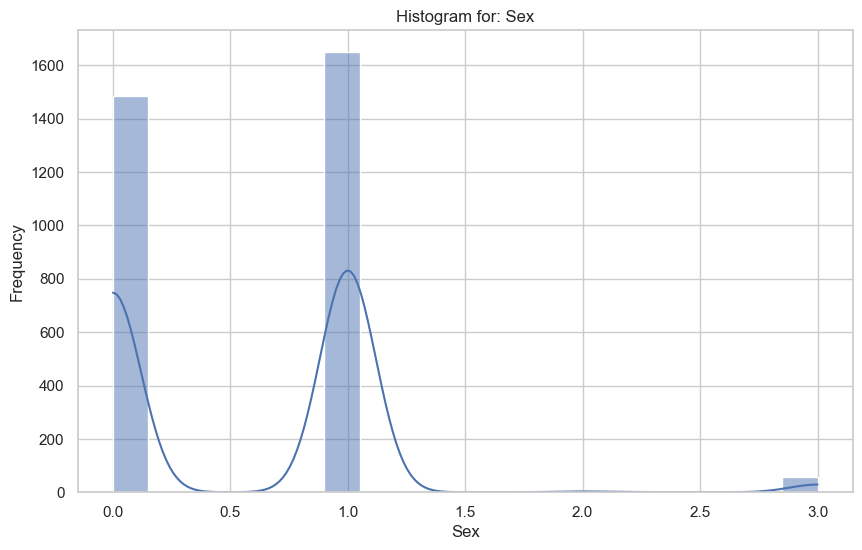

In [62]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

df_corr = augmented_df.drop(columns=["Row.names", "More"])
correlation_matrix = df_corr.corr()


threshold = 0.1  # vrem un prag pt corelatii relevante
filtered_corr_matrix = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

plt.figure(figsize=(16, 12))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot_kws={"size": 8}) 
plt.title('Matricea de corelație între atribute (corelații semnificative)', size=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

sns.set_theme(style="whitegrid")

numeric_columns = [col for col in augmented_df.select_dtypes(include=['number']).columns if col not in ["Row.names", "More", "Time stamp"]]
column_index = 0
show_histogram = True
show_boxplot = False

def plot_next():
    global column_index, show_histogram, canvas
    if column_index < len(numeric_columns):
        column = numeric_columns[column_index]

        for widget in plot_frame.winfo_children():
            widget.destroy()

        fig, ax = plt.subplots(figsize=(10, 6))

        if show_histogram:
            sns.histplot(augmented_df[column], bins=20, kde=True, ax=ax)
            ax.set_title(f'Histogram for: {column}')
            ax.set_xlabel(column)
            ax.set_ylabel('Frequency')
            show_histogram = False
            show_boxplot = True
        else:
            sns.boxplot(x=augmented_df[column], ax=ax)
            ax.set_title(f'Boxplot for: {column}')
            ax.set_xlabel(column)
            show_boxplot = False
            show_histogram = True
            column_index += 1

        canvas = FigureCanvasTkAgg(fig, master=plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()
    else:
        messagebox.showinfo("End", "No more columns to display.")
        root.quit()

root = tk.Tk()
root.title("Navigator")

plot_frame = tk.Frame(root)
plot_frame.pack(pady=20)

next_button = tk.Button(root, text="Next", command=plot_next)
next_button.pack(pady=10)

plot_next()

root.mainloop()
